# Przetwarzanie Grafiki i Muzyki - laboratorium nr 4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Zadanie 1 (1.5 punkta)
Proszę zaimplementować (ręcznie) konwersję z formatu RGB na YCbCr (https://en.wikipedia.org/wiki/YCbCr) i przetestować na wybranym przez siebie obrazku. Wzór:

$$
\begin{align}
Y &= 0.299 \cdot R + 0.587\cdot G + 0.114\cdot B \\
C_B &= 0.5 -0.169\cdot R - 0.331 \cdot G + 0.5\cdot B \\
C_R &= 0.5 + 0.5\cdot R - 0.419\cdot G - 0.081\cdot B,
\end{align}
$$

gdzie $R, G, B \in [0,1]$.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


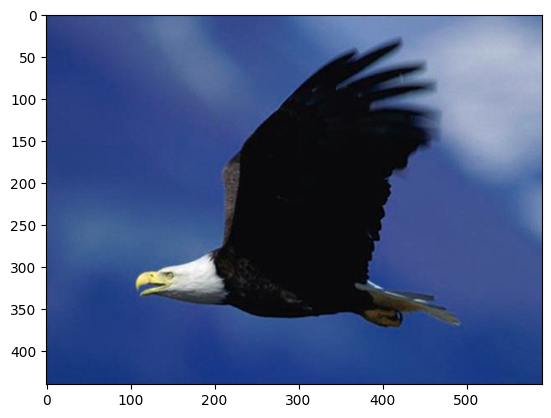

In [28]:
eagle = cv2.imread('img/eagle.jpg')

eagle = eagle.astype('float32') / 255

Y = 0.299 * eagle[:,:,2] + 0.587 * eagle[:,:,1] + 0.114 * eagle[:,:,0]
CB = 0.5 - 0.169 * eagle[:,:,2] - 0.331 * eagle[:,:,1] + 0.5 * eagle[:,:,0]
CR = 0.5 + 0.5 * eagle[:,:,2] - 0.419 * eagle[:,:,1] - 0.081 * eagle[:,:,0]

converted = np.dstack([Y,CB,CR])

plt.imshow(cv2.cvtColor(converted, cv2.COLOR_YCrCb2BGR))

## Zadanie 2 (1.5 punkta)

Proszę zaimplementować ręcznie konwersję z formatu YCbCr na RGB (https://en.wikipedia.org/wiki/YCbCr). Przetestuj kod na obrazie wynikowym z poprzedniego zadania. Wzór:

$$
\begin{align}
    R &= Y + 1.402*(C_R - 0.5) \\
    G &= Y - 0.344*(C_B - 0.5)-0.714*(C_R - 0.5) \\
    B &= Y + 1.772*(C_B - 0.5)
\end{align}
$$

gdzie $Y, C_R, C_B \in [0, 1]$.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0068471


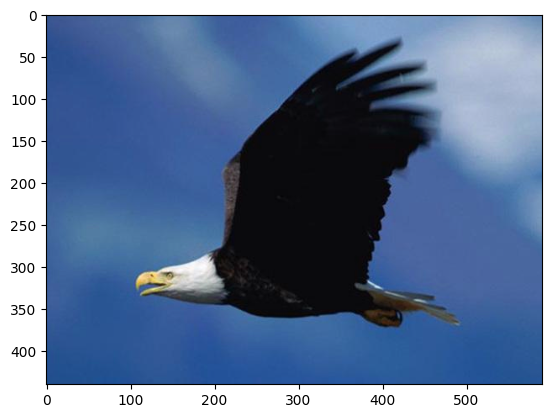

In [42]:
eagle = (cv2.cvtColor(cv2.imread('img/eagle.jpg'), cv2.COLOR_RGB2YCrCb) / 255).astype(np.float32)

R = eagle[:,:,0] + 1.402 * (eagle[:,:,1] - 0.5)
G = eagle[:,:,0] - 0.344 * (eagle[:,:,2] - 0.5) - 0.714 * (eagle[:,:,1] - 0.5)
B = eagle[:,:,0] + 1.772 * (eagle[:,:,2] - 0.5)

eagle_rgb = np.dstack([B,G,R])
print(eagle_rgb.max())
plt.imshow(eagle_rgb)

## Zadanie 3 (1 punkt)
Proszę zaimplementować konwersję z formatu RGB na HLS i wyświetlić składowe H, L oraz S. Tutaj można użyć gotowej metody z pakietu OpenCV (cv2.COLOR_BGR2HLS).

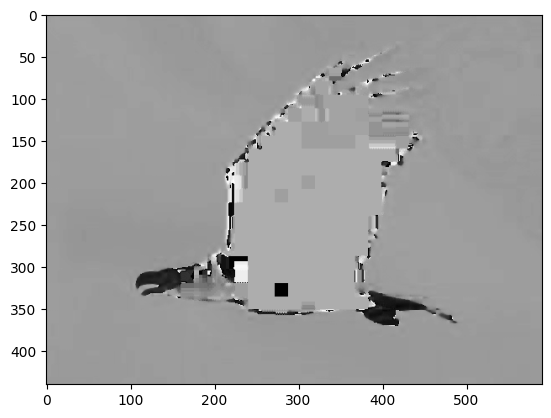

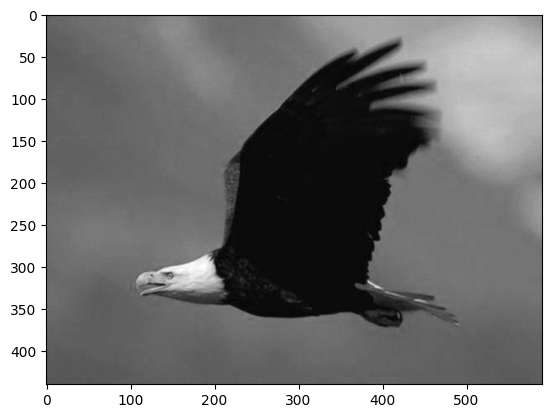

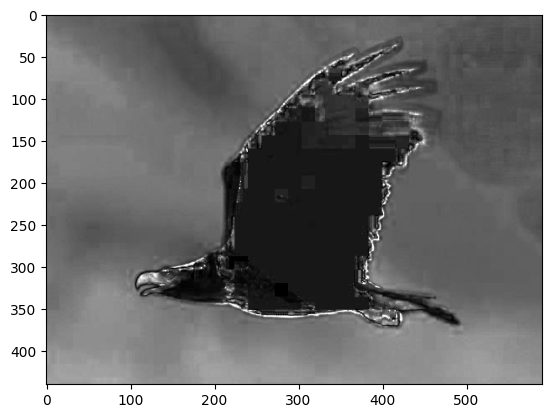

In [46]:
eagle_hls = cv2.cvtColor(cv2.imread('img/eagle.jpg'), cv2.COLOR_BGR2HLS)

plt.figure()
plt.imshow(eagle_hls[:,:,0], cmap='gray')
plt.figure()
plt.imshow(eagle_hls[:,:,1], cmap='gray')
plt.figure()
plt.imshow(eagle_hls[:,:,2], cmap='gray')

## Zadanie 4 (2 punkty)

Proszę stworzyć obrazek zawierający tylko zielone papryczki (analogicznie do przykładu z wykładu). Użyj obrazku "peppers.png".

HINT - zielone papryczki znajdują się tam, gdzie $R\in [20, 120]$ i $G \in [20, 160]$. R i G to natężenie składowych koloru w modelu RGB.

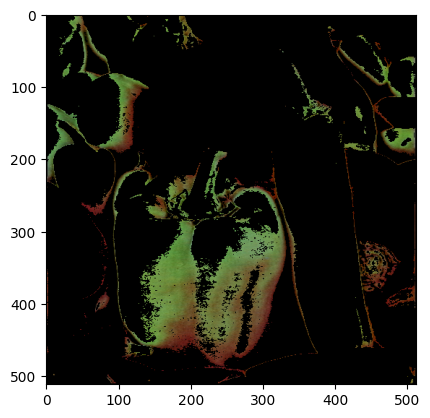

In [62]:
peppers = cv2.imread('img/peppers.png')

red_lower_mask = peppers[:,:,2] >= 20
red_upper_mask = peppers[:,:,2] <= 120
green_lower_mask = peppers[:,:,1] >= 20
green_upper_mask = peppers[:,:,1] <= 160

mask = red_upper_mask & red_upper_mask & green_upper_mask & green_lower_mask
peppers *= np.dstack([mask, mask, mask])
plt.imshow(cv2.cvtColor(peppers, cv2.COLOR_BGR2RGB))

## Zadanie 5 (2 punkty)
Proszę dokonać detekcji skóry na zdjęciu "face.jpg", używając modelu HLS.

HINT - skóra znajduje się tam, gdzie spełniona jest następująca reguła:
$$
\left(S \geq 50\right) \land \left(0.5 < \frac{L}{S} < 3 \right) \land \left( \left(H \leq 14\right) \lor \left(H \geq 165\right) \right) 
$$

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/face.jpg)

C:\Users\Wojtek\AppData\Local\Temp\ipykernel_17452\3779570428.py:4: RuntimeWarning: divide by zero encountered in divide
  ls_mask1 = face_hls[:,:,1]/face_hls[:,:,2] > 0.5
C:\Users\Wojtek\AppData\Local\Temp\ipykernel_17452\3779570428.py:5: RuntimeWarning: divide by zero encountered in divide
  ls_mask2 = face_hls[:,:,1]/face_hls[:,:,2] < 3


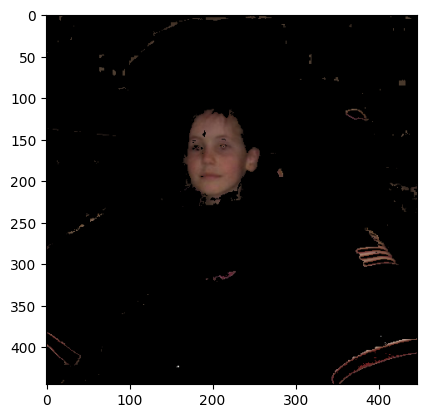

In [73]:
face_hls = cv2.cvtColor(cv2.imread('img/face.jpg'), cv2.COLOR_BGR2HLS)

s_mask = face_hls[:,:,2] >= 50
ls_mask1 = face_hls[:,:,1]/face_hls[:,:,2] > 0.5
ls_mask2 = face_hls[:,:,1]/face_hls[:,:,2] < 3
h_mask = (face_hls[:,:,0] <= 14) | (face_hls[:,:,0] >= 165)

mask = s_mask & ls_mask2 & ls_mask1 & h_mask

face_hls *= np.dstack([mask, mask, mask])
plt.imshow(cv2.cvtColor(face_hls, cv2.COLOR_HLS2RGB))

##  Zadanie 6 (2 punkty)
Proszę dokonać detekcję efektu czerwonych oczu na zdjęciu "face1.jpg".

HINT - czerwone oczy znajdują się tam, gdzie jest spełniona następująca reguła:
$$
\left( L \geq 64 \right) \land \left(S \geq 100\right) \land \left(0.5 < \frac{L}{S} < 1.5 \right) \land \left( \left(H \leq 7\right) \lor \left(H \geq 162\right) \right) 
$$

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/face1.jpg)

C:\Users\Wojtek\AppData\Local\Temp\ipykernel_17452\3630879899.py:5: RuntimeWarning: divide by zero encountered in divide
  ls_mask1 = face_hls[:,:,1]/face_hls[:,:,2] > 0.5
C:\Users\Wojtek\AppData\Local\Temp\ipykernel_17452\3630879899.py:6: RuntimeWarning: divide by zero encountered in divide
  ls_mask2 = face_hls[:,:,1]/face_hls[:,:,2] < 1.5


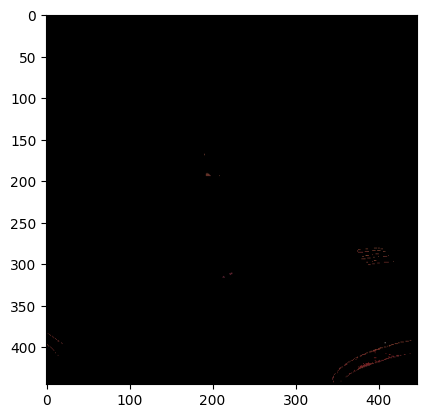

In [74]:
face_hls = cv2.cvtColor(cv2.imread('img/face.jpg'), cv2.COLOR_BGR2HLS)

l_mask = face_hls[:,:,1] >= 64
s_mask = face_hls[:,:,2] >= 100
ls_mask1 = face_hls[:,:,1]/face_hls[:,:,2] > 0.5
ls_mask2 = face_hls[:,:,1]/face_hls[:,:,2] < 1.5
h_mask = (face_hls[:,:,0] <= 7) | (face_hls[:,:,0] >= 162)

mask = s_mask & ls_mask2 & ls_mask1 & h_mask & l_mask

face_hls *= np.dstack([mask, mask, mask])
plt.imshow(cv2.cvtColor(face_hls, cv2.COLOR_HLS2RGB))